In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("baseline/key_times.csv")

In [6]:
df.head() # Note times are in seconds

,key,time,distance,iteration
0,b,0.634781,2,0
1,m,0.551876,1,0
2,u,0.565080,1,0
3,j,0.533730,0,0
4,",",0.804050,1,0


In [22]:
avg_times = df.groupby(["key"], as_index=False).mean()[["key", "time", "distance"]]

In [24]:
avg_times.head()

,key,time,distance
0,",",0.721701,1.0
1,.,0.635377,1.0
2,;,0.583544,0.0
3,a,0.623853,0.0
4,b,0.644470,2.0


In [25]:
avg_times.columns = ["Key", "Average Time (s)", "Distance"]

In [29]:
avg_times["Distance"] = avg_times["Distance"].astype("int")

In [30]:
avg_times.head()

,Key,Average Time (s),Distance
0,",",0.721701,1
1,.,0.635377,1
2,;,0.583544,0
3,a,0.623853,0
4,b,0.644470,2


The modifier will be average time * (distance + 1) to account for `0`

In [31]:
avg_times["Modifier"] = avg_times["Average Time (s)"] * (avg_times["Distance"] + 1)

In [46]:
avg_times["Key"].unique()

array([',', '.', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z'], dtype=object)

In [32]:
avg_times.head()

,Key,Average Time (s),Distance,Modifier
0,",",0.721701,1,1.443402
1,.,0.635377,1,1.270754
2,;,0.583544,0,0.583544
3,a,0.623853,0,0.623853
4,b,0.644470,2,1.933409


In [45]:
avg_times.to_csv("baseline/with_modifier.csv")

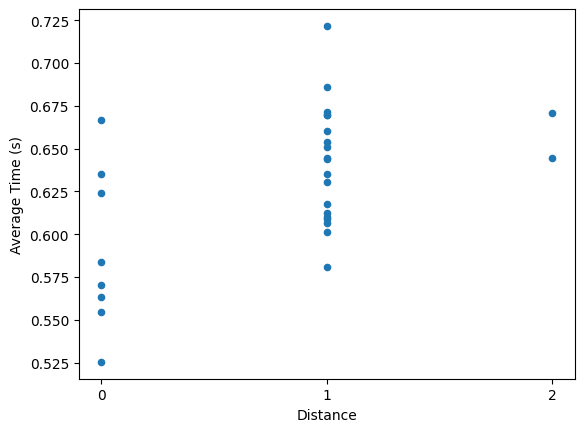

In [44]:
avg_times[["Distance", "Average Time (s)"]].plot(
    kind="scatter", 
    x="Distance", 
    y="Average Time (s)",
    xticks=[0,1,2]
);

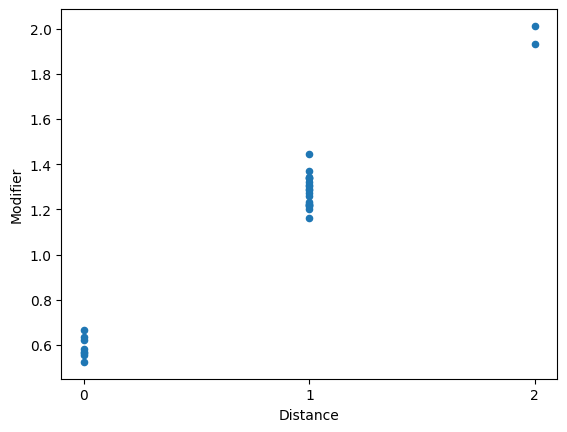

In [43]:
avg_times[["Distance", "Modifier"]].plot(
    kind="scatter", 
    x="Distance", 
    y="Modifier",
    xticks=[0,1,2]
);